In [24]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA

from nose.tools import assert_equal, assert_is_instance, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal
from pandas.util.testing import assert_frame_equal

In [19]:
data = pd.read_csv('/Users/ankitanambiar/diabetes_binary_health_indicators_BRFSS2015.csv')
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [21]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data)  
scaled

array([[-0.40235504,  1.15368814,  1.16525449, ...,  0.31690008,
        -1.06559465, -1.4744874 ],
       [-0.40235504, -0.86678537, -0.85818163, ..., -0.33793279,
         0.96327159, -2.44013754],
       [-0.40235504,  1.15368814,  1.16525449, ...,  0.31690008,
        -1.06559465,  0.93963796],
       ...,
       [-0.40235504, -0.86678537, -0.85818163, ..., -1.97501498,
        -0.05116153, -1.95731247],
       [-0.40235504,  1.15368814, -0.85818163, ..., -0.33793279,
        -0.05116153, -2.44013754],
       [ 2.48536712,  1.15368814,  1.16525449, ...,  0.31690008,
         0.96327159, -1.95731247]])

In [22]:
 def fit_pca(df, n_components):

    pca = PCA(n_components)
    pca.fit(df)
    
    return pca

In [23]:
n_components = 10
pca = fit_pca(scaled, n_components=n_components)

<AxesSubplot:title={'center':'Fraction of Explained Variance'}, xlabel='Dimension #', ylabel='Explained Variance Ratio'>

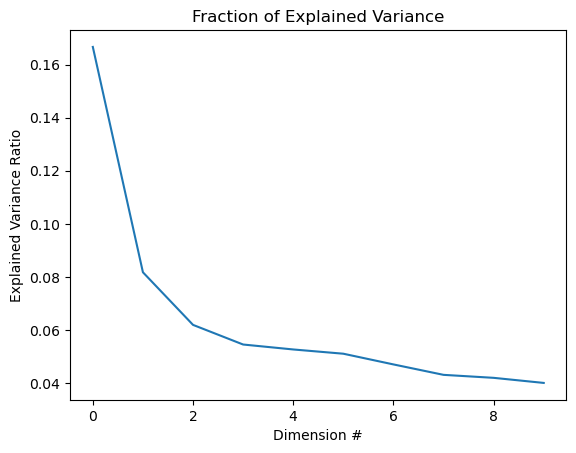

In [25]:
explained_variance = pca.explained_variance_ratio_
fig, ax = plt.subplots()
ax.plot(explained_variance)
ax.set_xlabel('Dimension #')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Fraction of Explained Variance')
ax

In [26]:
pca.explained_variance_ratio_

array([0.16666059, 0.08176027, 0.06194168, 0.05454349, 0.05268061,
       0.05107931, 0.04704635, 0.04311655, 0.04199187, 0.04007573])

In [27]:
cumulative_variance_ratio = np.cumsum(explained_variance)
cumulative_variance_ratio

array([0.16666059, 0.24842087, 0.31036255, 0.36490604, 0.41758666,
       0.46866597, 0.51571232, 0.55882887, 0.60082074, 0.64089647])

In [28]:
for i in range(len(cumulative_variance_ratio)):
    print(f"For {i+1} component(s), explained cumulative variance is {cumulative_variance_ratio[i]:.2%}")

For 1 component(s), explained cumulative variance is 16.67%
For 2 component(s), explained cumulative variance is 24.84%
For 3 component(s), explained cumulative variance is 31.04%
For 4 component(s), explained cumulative variance is 36.49%
For 5 component(s), explained cumulative variance is 41.76%
For 6 component(s), explained cumulative variance is 46.87%
For 7 component(s), explained cumulative variance is 51.57%
For 8 component(s), explained cumulative variance is 55.88%
For 9 component(s), explained cumulative variance is 60.08%
For 10 component(s), explained cumulative variance is 64.09%


Explored dimension reduction and applied PCA. Dimension reduction may not be needed in our case, and 10 components only explain ~64% of variance.

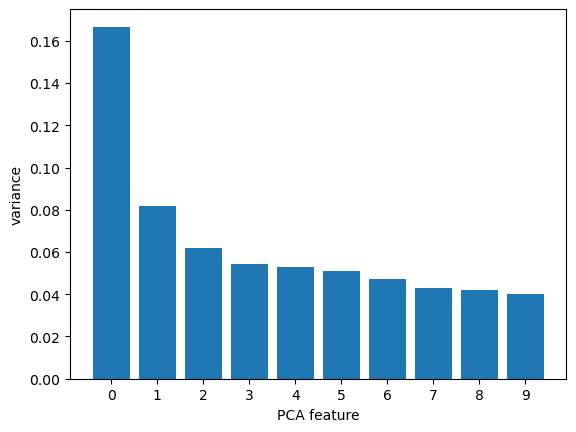

In [30]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.ylabel('variance')

plt.xticks(features)
plt.show()

In [32]:
var_exp = pca.explained_variance_ratio_

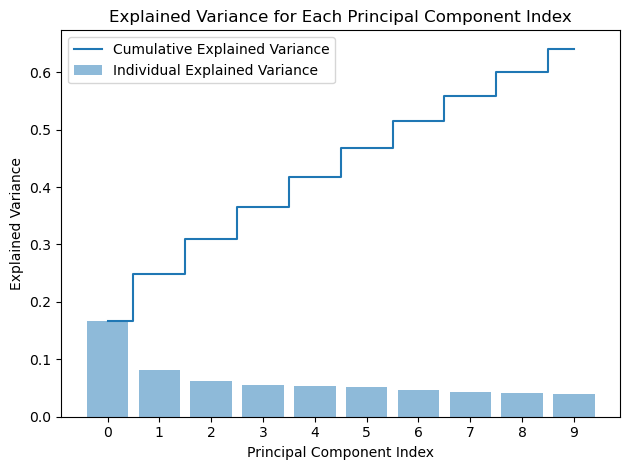

In [38]:
import matplotlib.pyplot as plt
cum_sum_exp = np.cumsum(explained_variance)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative Explained Variance')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Component Index')
plt.title('Explained Variance for Each Principal Component Index')
plt.legend(loc='best')
plt.xticks(features)
plt.tight_layout()
plt.show()